In [1]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt
#  这些库很重要，一定要记住

###  数据的归一化，比如说，有两个 特征量
### 但是 其中一个特征量 很大，另一个特征量没有作用了，所以数据要归一化
###  将所有的数据映射到同一尺度上面

### 最值归一化，所有数据映射到0-1之间
#### a=max-min    ( x^(i)-x(min) )/a  就是数据的归一化
#### 适用于有明显的边界的情况，但是收outliner 影响较大

### 均值方差归一化
#### 所有数据归一到均值为0，方差为1的分布中 
#### 适用于没有边界的例子，有可能存在极端数据值
#### 一般都是使用 均值反差归一化
####  x(scale)=( x-x(mean) )/s     (mean) 是均值 ，s是方差

## 最值归一化

In [2]:
np.random.seed(1)
x=np.random.randint(0,100,size=(100))
print(x)
print('----------')
y=np.random.uniform(1,10,size=(3,3))
print(y)

[37 12 72  9 75  5 79 64 16  1 76 71  6 25 50 20 18 84 11 28 29 14 50 68
 87 87 94 96 86 13  9  7 63 61 22 57  1  0 60 81  8 88 13 47 72 30 71  3
 70 21 49 57  3 68 24 43 76 26 52 80 41 82 15 64 68 25 98 87  7 26 25 22
  9 67 23 27 37 57 83 38  8 32 34 10 23 15 87 25 71 92 74 62 46 32 88 23
 55 65 77  3]
----------
[[5.86540458 7.88936594 1.40811156]
 [2.25969507 8.13163227 1.26821222]
 [8.94812928 5.86709371 5.03182163]]


In [3]:
(x-np.min(x))/(np.max(x)-np.min(x)) #进行了归一化

array([0.37755102, 0.12244898, 0.73469388, 0.09183673, 0.76530612,
       0.05102041, 0.80612245, 0.65306122, 0.16326531, 0.01020408,
       0.7755102 , 0.7244898 , 0.06122449, 0.25510204, 0.51020408,
       0.20408163, 0.18367347, 0.85714286, 0.1122449 , 0.28571429,
       0.29591837, 0.14285714, 0.51020408, 0.69387755, 0.8877551 ,
       0.8877551 , 0.95918367, 0.97959184, 0.87755102, 0.13265306,
       0.09183673, 0.07142857, 0.64285714, 0.62244898, 0.2244898 ,
       0.58163265, 0.01020408, 0.        , 0.6122449 , 0.82653061,
       0.08163265, 0.89795918, 0.13265306, 0.47959184, 0.73469388,
       0.30612245, 0.7244898 , 0.03061224, 0.71428571, 0.21428571,
       0.5       , 0.58163265, 0.03061224, 0.69387755, 0.24489796,
       0.43877551, 0.7755102 , 0.26530612, 0.53061224, 0.81632653,
       0.41836735, 0.83673469, 0.15306122, 0.65306122, 0.69387755,
       0.25510204, 1.        , 0.8877551 , 0.07142857, 0.26530612,
       0.25510204, 0.2244898 , 0.09183673, 0.68367347, 0.23469

In [4]:
x=np.random.randint(0,100,size=(50,2))

In [5]:
x[:10]

array([[43, 20],
       [30, 36],
       [ 7, 45],
       [68, 57],
       [82, 96],
       [13, 10],
       [23, 81],
       [ 7, 24],
       [74, 92],
       [20, 32]])

In [6]:
x=np.array(x,dtype='float')
x[:10]

array([[43., 20.],
       [30., 36.],
       [ 7., 45.],
       [68., 57.],
       [82., 96.],
       [13., 10.],
       [23., 81.],
       [ 7., 24.],
       [74., 92.],
       [20., 32.]])

In [15]:
x[:,0]=(x[:,0]-np.min(x[:,0]))/(np.max(x[:,0])-np.min(x[:,0]))

In [21]:
x[:,1]=(x[:,1]-np.min(x[:,1]))/(np.max(x[:,1])-np.min(x[:,1]))

In [23]:
x[:10,:]

array([[0.4       , 0.20408163],
       [0.25555556, 0.36734694],
       [0.        , 0.45918367],
       [0.67777778, 0.58163265],
       [0.83333333, 0.97959184],
       [0.06666667, 0.10204082],
       [0.17777778, 0.82653061],
       [0.        , 0.24489796],
       [0.74444444, 0.93877551],
       [0.14444444, 0.32653061]])

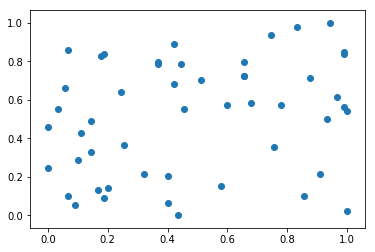

In [26]:
plt.scatter(x[:,0],x[:,1])      #  x坐标和y坐标
plt.show()

In [31]:
print(np.mean(x[:,0]))
print(np.std(x[:,0]))


0.48333333333333334
0.32967810713025464


In [33]:
print(np.mean(x[:,1]))
print(np.std(x[:,1]))

0.510408163265306
0.29063897205691586


##  均值防方差归一化


In [35]:
x2=np.random.uniform(0,100,size=(50,2))
print(x2)


[[5.99110308e+01 1.55332756e+00]
 [5.93481408e+01 4.33676349e+01]
 [8.07360529e+01 3.15244803e+01]
 [8.92888709e+01 5.77857215e+01]
 [1.84010202e+01 7.87929234e+01]
 [6.12031177e+01 5.39092721e+00]
 [4.20193680e+01 6.79068837e+01]
 [9.18601778e+01 4.02024891e-02]
 [9.76759149e+01 3.76580315e+01]
 [9.73783538e+01 6.04716101e+01]
 [8.28845808e+01 5.74711505e+01]
 [6.28076198e+01 2.85576282e+01]
 [5.86833341e+01 7.50021764e+01]
 [8.58313836e+01 7.55082188e+01]
 [6.98057248e+01 8.64479430e+01]
 [3.22680997e+01 6.70788791e+01]
 [4.50873936e+01 3.82102752e+01]
 [4.10811350e+01 4.01479583e+01]
 [3.17383946e+01 6.21919368e+01]
 [4.30247271e+01 9.73802078e+01]
 [6.77800891e+01 1.98569888e+01]
 [4.26701009e+01 3.43346240e+01]
 [7.97638804e+01 8.79998289e+01]
 [9.03841956e+01 6.62719812e+01]
 [2.70208262e+01 2.52366702e+01]
 [8.54897943e+01 5.27714646e+01]
 [8.02161084e+01 5.72488517e+01]
 [7.33142525e+01 5.19011627e+01]
 [7.70883911e+01 5.68857991e+01]
 [4.65709879e+01 3.42688908e+01]
 [6.820934

In [38]:
x2[:,0]=(x2[:,0]-np.mean(x2[:,0]))/ np.std(x2[:,0])
x2[:,1]=(x2[:,1]-np.mean(x2[:,1]))/ np.std(x2[:,1])

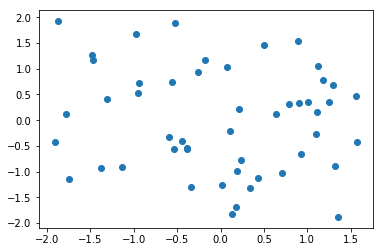

In [42]:
plt.scatter(x2[:,0],x2[:,1])
plt.show()

In [47]:
print(np.mean(x2[:,0]))
print(np.std(x2[:,0]))
print('-----------------')
print(np.mean(x2[:,1]))
print(np.std(x2[:,1]))

1.1435297153639113e-16
1.0
-----------------
4.4408920985006264e-17
0.9999999999999999
